# Lecture 3

## Pandas and Text Processing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/articles.csv")

In [3]:
df.sample()

,author,claps,reading_time,link,title,text
25,Netflix Technology Blog,365,10,https://medium.com/netflix-techblog/netflix-re...,Netflix Recommendations: Beyond the 5 stars (P...,by Xavier Amatriain and Justin Basilico (Perso...


In [5]:
df['title'][25]

'Netflix Recommendations: Beyond the 5 stars (Part 2)'

In [44]:
df['text'][25][:100]

'by Xavier Amatriain and Justin Basilico (Personalization Science and Engineering)\nIn part one of thi'

In [24]:
print(f"Number of samples: {df.shape[0]}\n")

Number of samples: 337



In [29]:
print(f"Sample exceprts:\n")
print(f"Excerpt - 1: {df.iloc[0]['title']} \n{df.iloc[0]['text']}\n")

Sample exceprts:

Excerpt - 1: Chatbots were the next big thing: what happened? – The Startup – Medium 
Oh, how the headlines blared:
Chatbots were The Next Big Thing.
Our hopes were sky high. Bright-eyed and bushy-tailed, the industry was ripe for a new era of innovation: it was time to start socializing with machines.
And why wouldn’t they be? All the road signs pointed towards insane success.
At the Mobile World Congress 2017, chatbots were the main headliners. The conference organizers cited an ‘overwhelming acceptance at the event of the inevitable shift of focus for brands and corporates to chatbots’.
In fact, the only significant question around chatbots was who would monopolize the field, not whether chatbots would take off in the first place:
One year on, we have an answer to that question.
No.
Because there isn’t even an ecosystem for a platform to dominate.
Chatbots weren’t the first technological development to be talked up in grandiose terms and then slump spectacularly.
T

## Number of words in text

In [116]:
text = """That’s why it’s still impossible to imagine effective customer support,
sales or marketing without the essential human touch: empathy and emotional 
intelligence."""
print("List of words:", str(text).split())
print("Set of words:", set(str(text).split()))
print("Word Count:", len(set(str(text).split())))


List of words: ['That’s', 'why', 'it’s', 'still', 'impossible', 'to', 'imagine', 'effective', 'customer', 'support,', 'sales', 'or', 'marketing', 'without', 'the', 'essential', 'human', 'touch:', 'empathy', 'and', 'emotional', 'intelligence.']
Set of words: {'why', 'or', 'intelligence.', 'support,', 'sales', 'essential', 'emotional', 'without', 'effective', 'empathy', 'impossible', 'to', 'human', 'imagine', 'touch:', 'marketing', 'the', 'That’s', 'it’s', 'and', 'customer', 'still'}
Word Count: 22


In [32]:
df['text_num_words'] = df["text"].apply(lambda x: len(set(str(x).split())))

In [36]:
df.head(1)

,author,claps,reading_time,link,title,text,text_num_words,text_num_chars
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",1031,12129


## Number of characters in text

In [117]:
text = """That’s why it’s still impossible to imagine effective customer support,
sales or marketing without the essential human touch: empathy and emotional 
intelligence."""

In [118]:
print("str:", str(text))
print("length:", len(str(text)))

str: That’s why it’s still impossible to imagine effective customer support,
sales or marketing without the essential human touch: empathy and emotional 
intelligence.
length: 162


In [119]:
df["text_num_chars"] = df["text"].apply(lambda x: len(str(x)))

In [37]:
df.head(1)

,author,claps,reading_time,link,title,text,text_num_words,text_num_chars
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",1031,12129


## Number of paragraphs in text

In [39]:
df['text_num_paragraphs'] = df['text'].apply(lambda x: len(x.split("\n"))) 

In [40]:
df.head(1)

,author,claps,reading_time,link,title,text,text_num_words,text_num_chars,text_num_paragraphs
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",1031,12129,95


## Number of Sentences in Text

In [41]:
df['text_num_sent'] = df['text'].apply(lambda x: len(str(x).split('.')))

In [42]:
df.head(1)

,author,claps,reading_time,link,title,text,text_num_words,text_num_chars,text_num_paragraphs,text_num_sent
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",1031,12129,95,127


## Average word length in text

In [120]:
import numpy as np
df['text_mean_word_len'] = df['text'].apply(lambda x: 
                                        np.mean([len(w) for w in str(x).split()]))
df.head()

,author,claps,reading_time,link,title,text,text_num_words,text_num_chars,text_num_paragraphs,text_num_sent,text_mean_word_len,text_num_contraction,pos
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",1031,12129,95,127,5.119576,0,"[NN, NNS, NNP, NNPS]"
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If you’ve ever found yourself looking up the s...,637,7730,39,65,4.764355,0,"[NN, NNS, NNP, NNPS]"
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python – Towa...,Machine learning is increasingly moving from h...,764,14070,48,107,5.117391,0,"[NN, NNS, NNP, NNPS]"
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,677,8076,48,105,4.691332,0,"[NN, NNS, NNP, NNPS]"
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch – Insight ...,Want to learn about applied Artificial Intelli...,879,13784,47,105,4.803789,0,"[NN, NNS, NNP, NNPS]"


In [123]:
text = ' '.join(str(x) for x in df['text'])
print(text[:100])

Oh, how the headlines blared:
Chatbots were The Next Big Thing.
Our hopes were sky high. Bright-eyed


In [131]:
import wordcloud as wc
import matplotlib.pylab as plt

(-0.5, 1599.5, 799.5, -0.5)

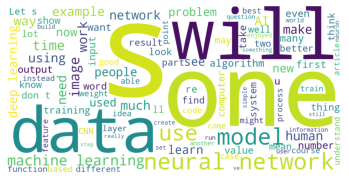

In [137]:
wordcloud = wc.WordCloud(width=1600, height=800, max_words=100, background_color="white").generate(text)
plt.imshow(wordcloud)
plt.axis("off")